In [1]:
import os
import random
# Paths
root = '/kaggle/input/bird-species-classification-220-categories'
train_path = root + '/Train'
test_path = root + '/Test'

# Get labels
train_labels = [i for i in os.listdir(train_path)]
test_labels = [i for i in os.listdir(test_path)]

tmp_train_img_paths = [train_path + '/' + j for j in train_labels]
tmp_test_img_paths = [test_path + '/' + j for j in test_labels]
train_img_paths, test_img_paths = [], []

for i in tmp_train_img_paths:
    for j in os.listdir(i):
        train_img_paths.append(i + '/' + j)
for i in tmp_test_img_paths:
    for j in os.listdir(i):
        test_img_paths.append(i + '/' + j)
del tmp_test_img_paths, tmp_train_img_paths

random.shuffle(train_img_paths)
random.shuffle(test_img_paths)

# label2name, name2label
label2name, name2label = {}, {}
for i in range(len(train_labels)):
    label2name[i] = train_labels[i]
    name2label[train_labels[i]] = i

In [2]:
import torch
from torch import nn
from torchvision import models, transforms
import os
import cv2
from PIL import Image
import matplotlib.pyplot as plt
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])
num_classes = len(os.listdir('/kaggle/input/bird-species-classification-220-categories/Train'))
model = models.resnet101(pretrained=False)
model.fc = nn.Linear(model.fc.in_features, num_classes)
model_path = '/kaggle/input/best_model_resnet101_epoch16/pytorch/default/1/best_model16.pth'
model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu')))
model.eval()

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/tmp/ipykernel_13/328489986.py:19: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

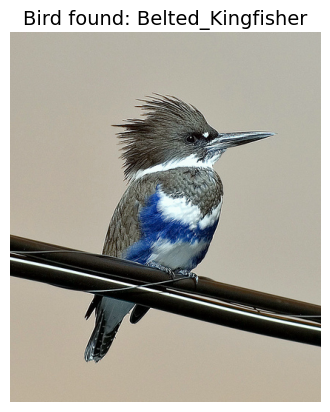

In [3]:
import random
import matplotlib.pyplot as plt
import cv2
test_img_path = random.choice(test_img_paths + train_img_paths)
img = cv2.imread(test_img_path)
input_tensor = transform(img).unsqueeze(0)
with torch.no_grad():
    output = model(input_tensor)
    item_index = torch.argmax(output, dim=1).item()
    item_class = label2name[item_index]
plt.imshow(img)
plt.title(f"Bird found: {item_class}", fontsize=14)
plt.axis('off')
plt.show()